In [97]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import Entrez
from scipy.cluster.hierarchy import dendrogram, linkage
import subprocess
import multiprocessing
import plotly.express as px
import glob

In [ ]:
os.path.is('DATA/bats/calculated_breadth/bat2-2015.txt')

SyntaxError: invalid syntax (2724830501.py, line 1)

In [100]:
ictv_data = pd.read_excel('DATA/sheets/ictv_taxo.xlsx')
taxo_index = pd.read_csv('DATA/sheets/genbank_accessions.csv', index_col=0)

In [86]:
all_dict = dict()
all_dict.update({'len':'sum', 'weighted_coverage':'sum'})
all_dict.update({i:'first' for i in ['rname', 'Realm', 'Kingdom',
       'Subkingdom', 'Phylum', 'Subphylum', 'Class', 'Order', 'Family', 'Genus', 'Species',
              'Virus name(s)', 'Virus GENBANK accession', 'Host source']})

In [94]:
for i in coverage_files:    
    data = pd.read_table(i)
    data['#rname'] = data['#rname'].apply(lambda x: x.split('|')[1])
    name = i.split('/')[-1]
    data = data.query('coverage > 0').rename(columns={'#rname':'rname'})
    data = data.set_index('rname')
    data = pd.merge(left=data.reset_index(), right=taxo_index.reset_index(), left_on='rname', right_on='index')
    data = pd.merge(left=data, right=ictv_data.reset_index(), left_on='ictv_taxo_index', right_on='index')
    data['weighted_coverage'] = data.endpos * 0.01 * data.coverage
    data['len'] = data.endpos
    data = data[['rname', 'Realm', 'Kingdom',
           'Subkingdom', 'Phylum', 'Subphylum', 'Class', 'Order', 'Family', 'Genus', 'Species',
                  'Virus name(s)', 'Virus GENBANK accession', 'Host source', 'weighted_coverage', 'len']]
    data = data.groupby('Species').agg(all_dict)
    data['coverage'] = data.weighted_coverage / data.len
    data = data.sort_values(by='coverage', ascending=False)
    data = data.drop(['len', 'weighted_coverage', 'rname'], axis=1)
    data = data[['Virus name(s)', 'Host source', 'coverage','Realm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum', 'Class',
       'Order', 'Family', 'Genus', 'Species',
       'Virus GENBANK accession', ]]
    data.to_csv(f'DATA/bats/ictv_coverage/{name.replace("txt", "csv")}')

In [ ]:
coverage_file = 'DATA/bats/calculated_breadth/bat2-2015.txt'
os.path.splitext(os.path.basename(coverage_file))[0]

'bat2-2015'

In [114]:
data = pd.read_table(coverage_file).rename(columns={'#rname': 'rname'}).drop(['startpos', 'numreads', 'covbases',
       'meandepth', 'meanbaseq', 'meanmapq'], axis=1)
data['rname'] = data['rname'].apply(lambda x: x.split('|')[1])

name = os.path.splitext(os.path.basename(coverage_file))[0]

data = data.copy()
data = data.set_index('rname')
data = pd.merge(left=data.reset_index(), right=taxo_index.reset_index(), left_on='rname', right_on='index')
data = pd.merge(left=data, right=ictv_data.reset_index(), left_on='ictv_taxo_index', right_on='index')


data['weighted_coverage'] = data.endpos * 0.01 * data.coverage
data['len'] = data.endpos

data = data
data = data.groupby('Species').agg(all_dict)

data['coverage'] = data.weighted_coverage / data.len
data = data.sort_values(by='coverage', ascending=False)

data = data[['Virus name(s)', 'Host source', 'coverage','Realm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum', 'Class',
   'Order', 'Family', 'Genus', 'Species',
   'Virus GENBANK accession', ]]

data.to_csv(f'DATA/bats/ictv_coverage/{name}.csv')

In [115]:
data

,Virus name(s),Host source,coverage,Realm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Order,Family,Genus,Species,Virus GENBANK accession
Species,,,,,,,,,,,,,,
Sinsheimervirus phiX174,Escherichia phage phiX174,bacteria,1.000000,Monodnaviria,Sangervirae,NaN,Phixviricota,None,Malgrandaviricetes,Petitvirales,Microviridae,Sinsheimervirus,Sinsheimervirus phiX174,J02482
Murine leukemia virus,Moloney murine leukemia virus,vertebrates,0.246639,Riboviria,Pararnavirae,NaN,Artverviricota,None,Revtraviricetes,Ortervirales,Retroviridae,Gammaretrovirus,Murine leukemia virus,AF033811
Myotis ricketti alphacoronavirus Sax-2011,BtMr-AlphaCoV/SAX2011,vertebrates,0.162055,Riboviria,Orthornavirae,NaN,Pisuviricota,None,Pisoniviricetes,Nidovirales,Coronaviridae,Alphacoronavirus,Myotis ricketti alphacoronavirus Sax-2011,KJ473806
Apscaviroid cvd-VII,Citrus viroid VII,plants,0.157609,None,None,NaN,None,None,None,None,Pospiviroidae,Apscaviroid,Apscaviroid cvd-VII,KX013549
Capsicum India alphasatellite,begomovirus-associated alphasatellite sp.,plants,0.122124,None,None,NaN,None,None,None,None,Alphasatellitidae,Clecrusatellite,Capsicum India alphasatellite,KU923759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beauveria bassiana victorivirus 1,Beauveria bassiana victorivirus 1,fungi,0.000000,Riboviria,Orthornavirae,NaN,Duplornaviricota,None,Chrymotiviricetes,Ghabrivirales,Totiviridae,Victorivirus,Beauveria bassiana victorivirus 1,HE572591
Tomato interveinal chlorosis virus,tomato interveinal chlorosis virus,plants,0.000000,Monodnaviria,Shotokuvirae,NaN,Cressdnaviricota,None,Repensiviricetes,Geplafuvirales,Geminiviridae,Begomovirus,Tomato interveinal chlorosis virus,DNA-A: JF803252
Apscaviroid pvd,persimmon viroid,plants,0.000000,None,None,NaN,None,None,None,None,Pospiviroidae,Apscaviroid,Apscaviroid pvd,AB366022


<AxesSubplot:xlabel='coverage', ylabel='Count'>

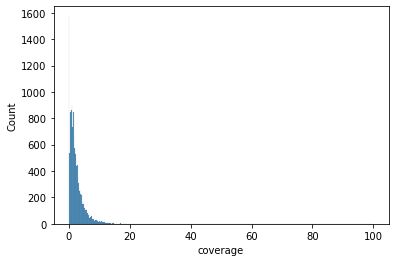

In [72]:
sns.histplot(data.coverage)

In [82]:
data[data['#rname'] == "AM261422"]

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq
1596,AM261422,1,330,56,69,20.9091,3.24242,37.1,30.0
